In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [184]:
sms_df = pd.read_csv("spam.csv", encoding='latin1')
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [178]:
sms_df.shape

(5572, 5)

## 1. Data Cleaning

In [179]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [180]:
sms_df[~sms_df['Unnamed: 2'].isnull()].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [185]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [186]:
sms_df.rename(columns={'v1':'output','v2':'sms'},inplace=True)
sms_df.sample(5)

,output,sms
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...
4136,ham,Just got to &lt;#&gt;
5006,ham,Oh k. . I will come tomorrow
2335,ham,Which is weird because I know I had it at one ...
5345,ham,Wat Ì_ doing now?


In [187]:
#converting to numerical form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sms_df['output']=le.fit_transform(sms_df['output'])

In [128]:
sms_df.head()

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
#checking missing values
sms_df.isnull().sum()

output    0
sms       0
dtype: int64

In [130]:
#checking dupicate values
print(sms_df.duplicated().sum())
print('percentage is',sms_df.duplicated().sum()*100/sms_df.shape[0])

403
percentage is 7.232591529073941


In [188]:
sms_df= sms_df.drop_duplicates(keep='first')

In [132]:
print(sms_df.duplicated().sum())
print('percentage is',sms_df.duplicated().sum()*100/sms_df.shape[0])

0
percentage is 0.0


## 2. EDA

In [133]:
sms_df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

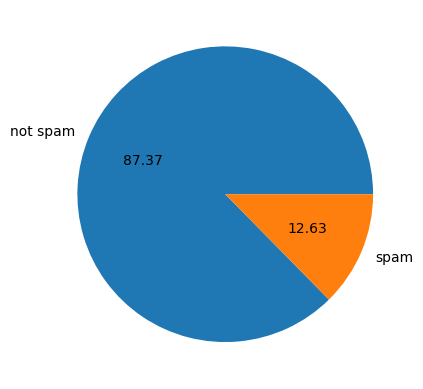

In [134]:
import matplotlib.pyplot as plt
plt.pie(sms_df['output'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [135]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [189]:
#number of character
sms_df['no_of_chars']=sms_df['sms'].apply(len)  

In [190]:
#number of words
'''def words(text): 
    l = text.split(" ")
    return len(l)'''

'def words(text): \n    l = text.split(" ")\n    return len(l)'

In [191]:
#number of words
from nltk.tokenize import word_tokenize
def words(text):
     return len(nltk.word_tokenize(text))

In [192]:
sms_df['no_of_words'] = sms_df['sms'].apply(words)

In [193]:
#number of lines
'''def lines(text):
    l = [i for i in text.split('.') if i.strip() != '']
    return len(l)'''

"def lines(text):\n    l = [i for i in text.split('.') if i.strip() != '']\n    return len(l)"

In [194]:
from nltk.tokenize import sent_tokenize
def lines(text):
     return len(nltk.sent_tokenize(text))

In [195]:
sms_df['no_of_lines'] = sms_df['sms'].apply(lines)

In [196]:
sms_df.head()

,output,sms,no_of_chars,no_of_words,no_of_lines
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [144]:
sms_df.iloc[3].sms

'U dun say so early hor... U c already then say...'

In [145]:
sms_df['sms'].apply(lambda x: x.split(" "))

0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, Ì_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: sms, Length: 5169, dtype: object

In [146]:
sms_df[['no_of_chars','no_of_words','no_of_lines']].describe()

,no_of_chars,no_of_words,no_of_lines
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [147]:
sms_df[sms_df['output']==0][['no_of_chars','no_of_words','no_of_lines']].describe()  #for not spam

,no_of_chars,no_of_words,no_of_lines
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [148]:
sms_df[sms_df['output']!=0][['no_of_chars','no_of_words','no_of_lines']].describe() #for spam

,no_of_chars,no_of_words,no_of_lines
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


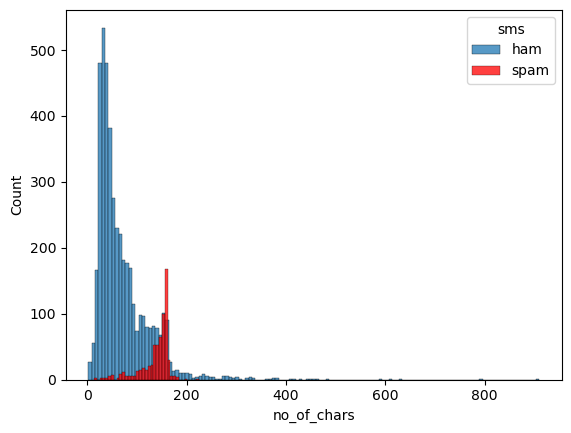

In [149]:
sns.histplot(sms_df[sms_df['output']==0]['no_of_chars'],label='ham')
sns.histplot(sms_df[sms_df['output']!=0]['no_of_chars'],color='red',label='spam')
plt.legend(title='sms',loc='upper right')
plt.show()

C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


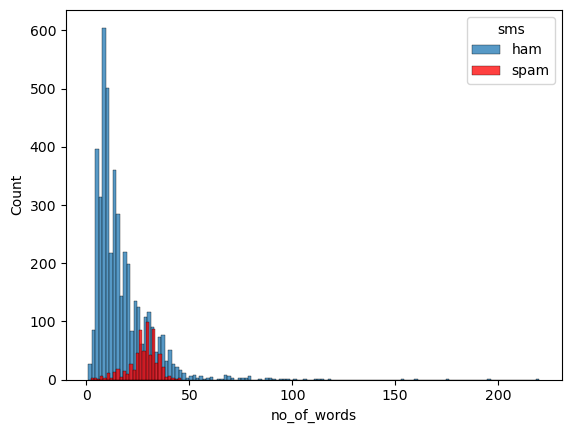

In [150]:
sns.histplot(sms_df[sms_df['output']==0]['no_of_words'],label='ham')
sns.histplot(sms_df[sms_df['output']!=0]['no_of_words'],color='red',label='spam')
plt.legend(title='sms',loc='upper right')
plt.show()

C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


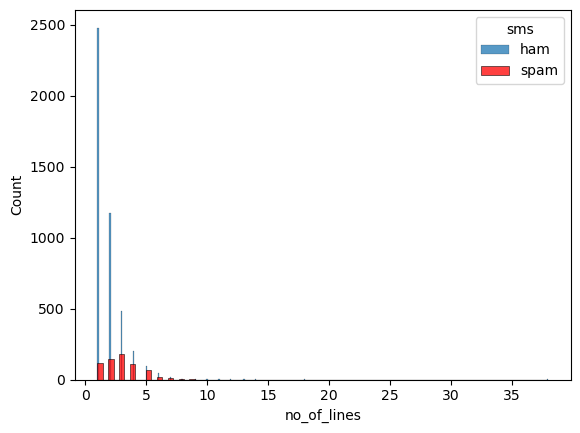

In [151]:
sns.histplot(sms_df[sms_df['output']==0]['no_of_lines'],label='ham')
sns.histplot(sms_df[sms_df['output']!=0]['no_of_lines'],color='red',label='spam')
plt.legend(title='sms',loc='upper right')
plt.show()

C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


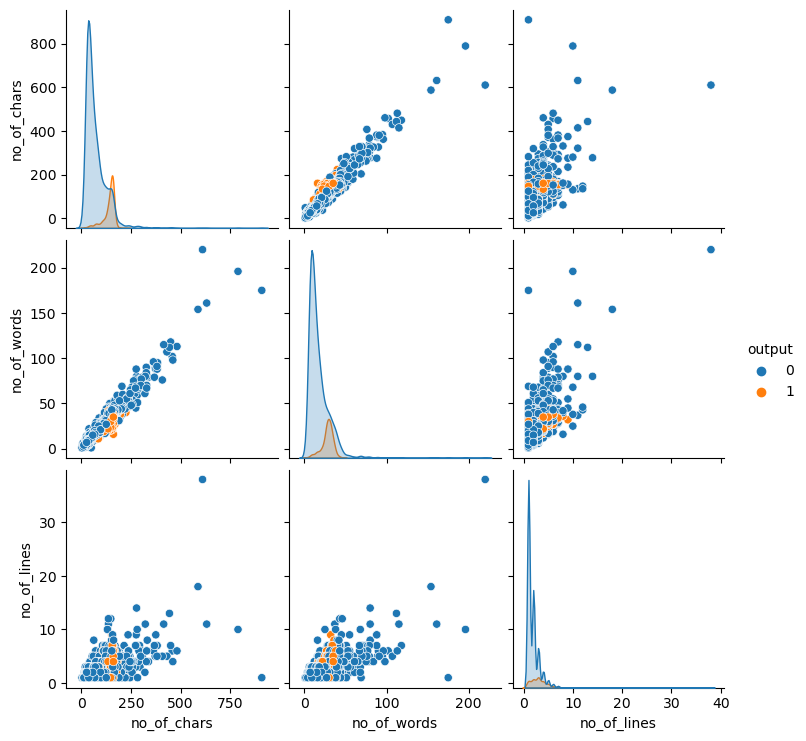

In [152]:
sns.pairplot(sms_df,hue='output')

1. No. of words and no. of chars have a linear relationship

In [153]:
corr = sms_df[['output', 'no_of_chars', 'no_of_words', 'no_of_lines']].corr()
corr

,output,no_of_chars,no_of_words,no_of_lines
output,1.000000,0.384717,0.262912,0.263939
no_of_chars,0.384717,1.000000,0.965760,0.624139
no_of_words,0.262912,0.965760,1.000000,0.679971
no_of_lines,0.263939,0.624139,0.679971,1.000000


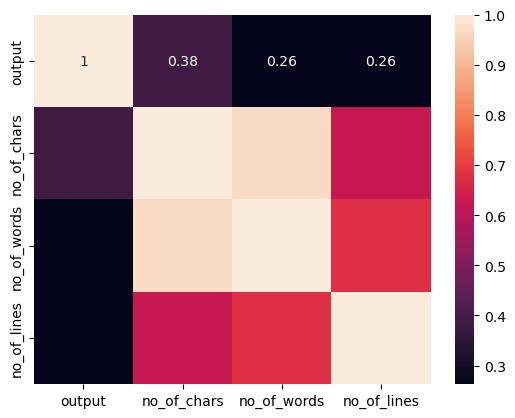

In [197]:
sns.heatmap(corr,annot=True)
plt.show()

## 3. Data Preprocessing

In [155]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [199]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
punctuations = set(string.punctuation)

In [200]:
def transformation(text):
    text = text.lower()    #lower case
    text = nltk.word_tokenize(text)     #tokenize

    l = []     #removing special char
    for i in text:
        if i.isalnum():
            l.append(i)
    text= l[:]
    l.clear()
    for i in text:
        if i not in stop_words and i not in punctuations:
            l.append(i)
    text=l[:]
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)


In [201]:
sms_df['transformed_sms']=sms_df['sms'].apply(transformation)

In [202]:
from wordcloud import WordCloud
wc = WordCloud(width = 400,height=400,min_font_size=10,background_color='white')

In [203]:
spam_wc = wc.generate(sms_df[sms_df['output']==1]['transformed_sms'].str.cat(sep=" "))

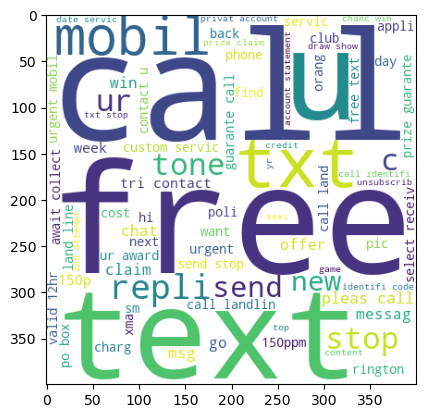

In [204]:
plt.imshow(spam_wc)

In [205]:
not_spam_wc = wc.generate(sms_df[sms_df['output']==0]['transformed_sms'].str.cat(sep=" "))

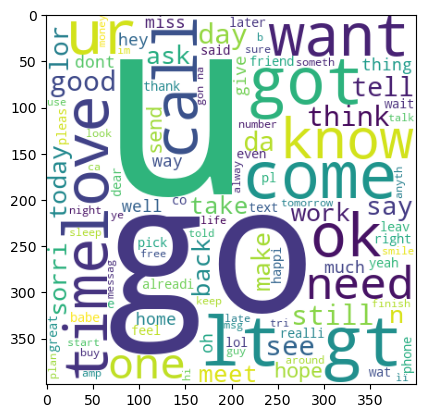

In [206]:
plt.imshow(not_spam_wc)

In [174]:
sms_df.head()

,output,sms,no_of_chars,no_of_words,no_of_lines,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
sms_df[sms_df['output'==1]]['transformed_sms'] 

In [228]:
spam_corpus=[]
for msg in sms_df[sms_df['output']==1]['transformed_sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [229]:
len(spam_corpus)

9939

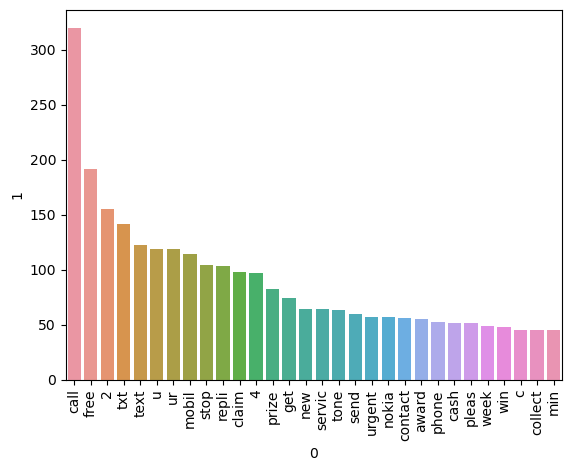

In [230]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [232]:
ham_corpus=[]
for msg in sms_df[sms_df['output']==0]['transformed_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [233]:
len(ham_corpus)

35404

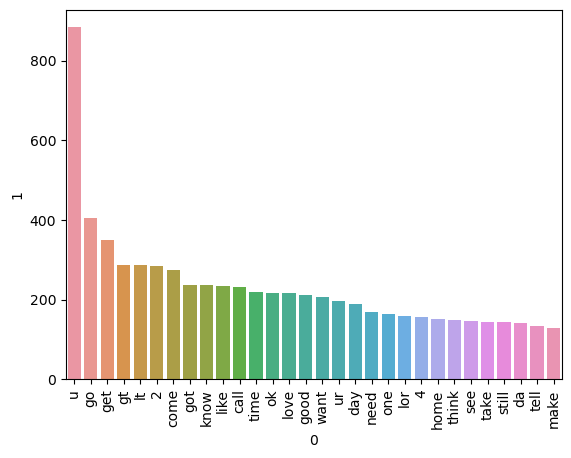

In [234]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [396]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidv = TfidfVectorizer(max_features=3000)

In [397]:
x = tfidv.fit_transform(sms_df['transformed_sms']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [376]:
#appending the num_character col to X
x = np.hstack((x,sms_df['no_of_chars'].values.reshape(-1,1)))

In [297]:
x.shape

(5169, 6708)

In [298]:
y = sms_df['output']

In [398]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=2)

In [300]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [301]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [342]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy score :",accuracy_score(y_test,y_pred1))
print("precision score :",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

accuracy score : 0.8694390715667312
precision score : 0.5068493150684932
[[788 108]
 [ 27 111]]


In [399]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy score :",accuracy_score(y_test,y_pred2))
print("precision score :",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

accuracy score : 0.9709864603481625
precision score : 1.0
[[896   0]
 [ 30 108]]


In [344]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy score :",accuracy_score(y_test,y_pred3))
print("precision score :",precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

accuracy score : 0.9835589941972921
precision score : 0.991869918699187
[[895   1]
 [ 16 122]]


In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [306]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [307]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [308]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [356]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [346]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [311]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,AdaBoost,Accuracy,0.961315
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


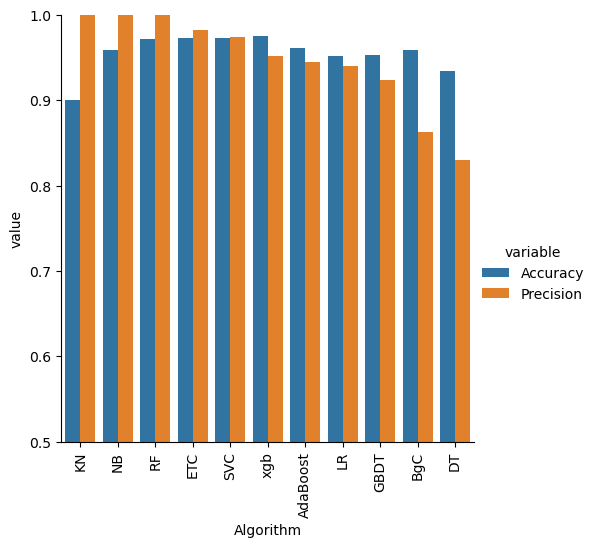

In [312]:
sns.catplot(data = performance_df1,x = 'Algorithm', y='value', 
               hue = 'variable', kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [351]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [357]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [352]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [353]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [358]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [359]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.970986,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.969052,0.927419
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.967118,0.964286
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [360]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [361]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.970986,1.000000,0.970986,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.969052,0.927419,0.969052,0.927419
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.967118,0.964286,0.967118,0.964286
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [367]:
#voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [377]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [382]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [383]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [384]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [385]:
from sklearn.ensemble import StackingClassifier

In [394]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [395]:
import pickle
pickle.dump(tfidv,open('vectorizer.pkl','wb'))


In [400]:
pickle.dump(mnb,open('model.pkl','wb'))